In [190]:
import pandas as pd

csv_path = 'Used german cars.csv'
df = pd.read_csv(csv_path, sep=';', quotechar='"')
df.head(3)

,Make,Model,Build Year,Engine Size,Transmission,Mileage [km],Fuel,Fuel efficiency,Price [EUR]
0,Audi,A1,2017,1.4,Manual,25318,Petrol,55.4,12500
1,Audi,A6,2016,2.0,Automatic,58251,Diesel,64.2,16500
2,Audi,A1,2016,1.4,Manual,48183,Petrol,55.4,11000


In [191]:
df.describe()

,Build Year,Engine Size,Mileage [km],Fuel efficiency,Price [EUR]
count,34568.000000,34568.000000,34568.000000,34568.000000,34568.000000
mean,2017.168132,2.058086,38525.910553,54.190063,23529.611490
std,2.249212,0.583447,37401.207586,21.245980,11706.977313
min,1970.000000,0.000000,2.000000,1.100000,650.000000
25%,2016.000000,1.600000,9441.750000,44.100000,15990.000000
50%,2017.000000,2.000000,27622.500000,52.300000,21000.000000
75%,2019.000000,2.100000,56315.000000,62.800000,28298.000000
max,2020.000000,6.600000,519707.000000,470.800000,159999.000000


In [192]:
df.isna().sum()

Make               0
Model              0
Build Year         0
Engine Size        0
Transmission       0
Mileage [km]       0
Fuel               0
Fuel efficiency    0
Price [EUR]        0
dtype: int64

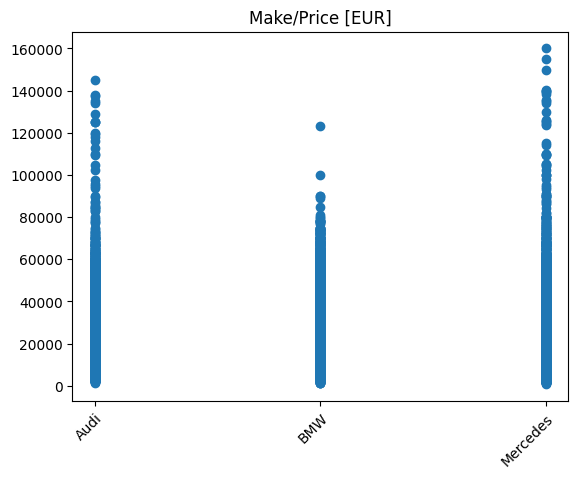

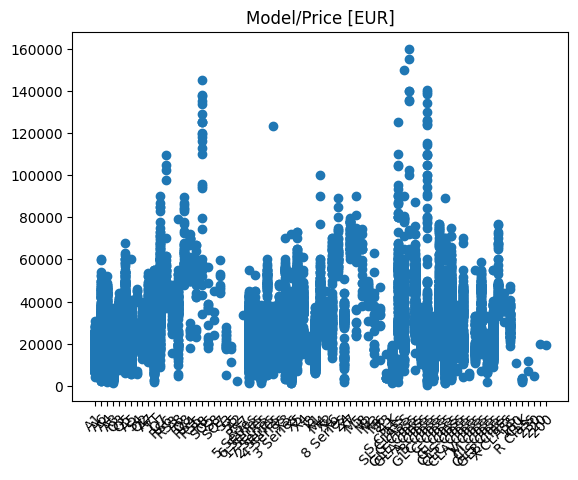

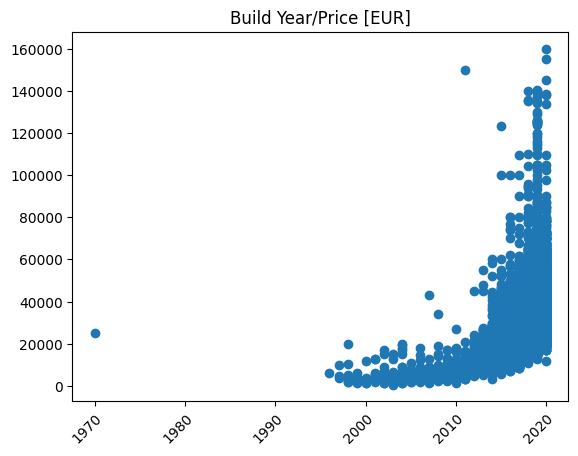

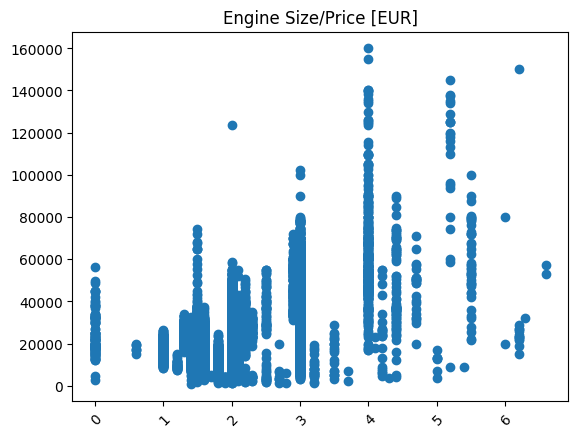

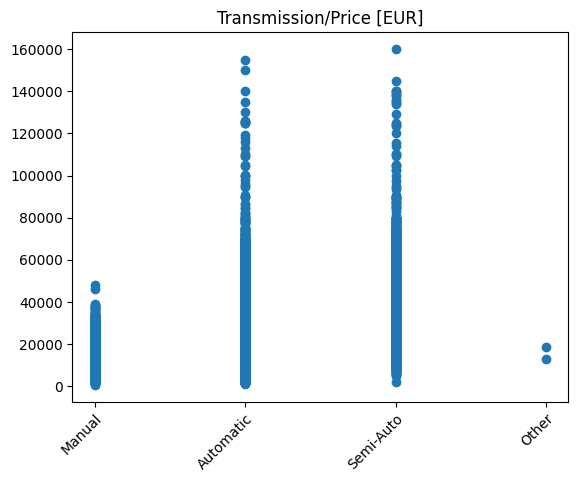

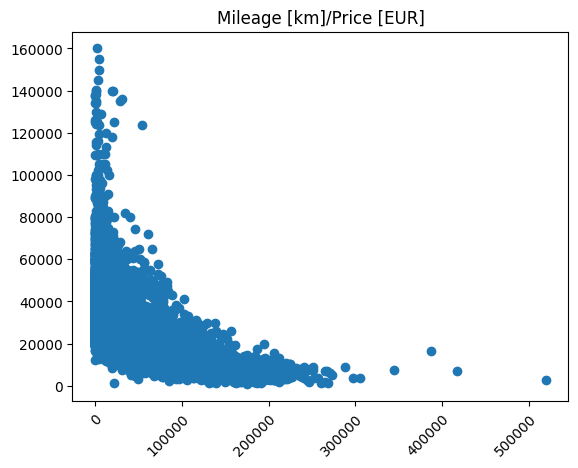

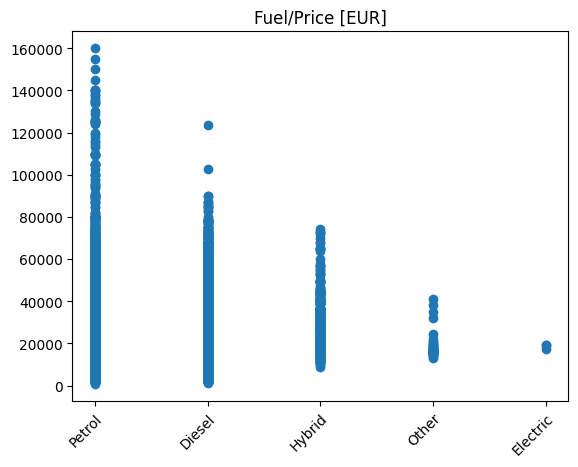

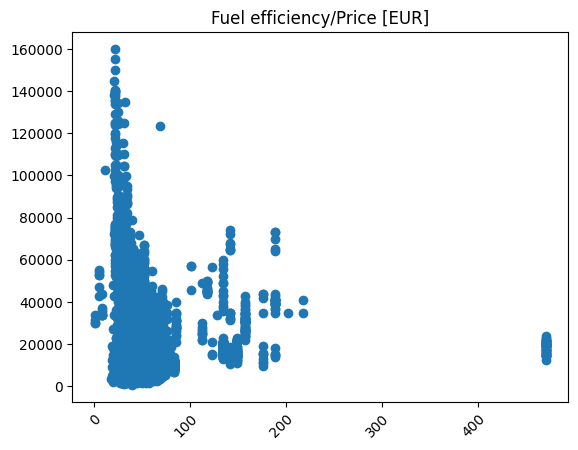

In [193]:
import matplotlib.pyplot as plt

for col in df.columns:
    if not col == "Price [EUR]":
        plt.scatter(x=df[col], y=df["Price [EUR]"])
        plt.title(label=col + "/Price [EUR]")
        plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
        plt.show()



In [194]:
from sklearn.model_selection import train_test_split

df.drop("Model", inplace=True, axis=1)
# Risk of heart attack is the target variable
X = df.drop("Price [EUR]", axis=1)
y = df["Price [EUR]"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make a copy of the original data to make changes on
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [195]:
from sklearn.preprocessing import LabelEncoder

for label in ["Make", "Fuel", "Transmission"]:
    lb = LabelEncoder()

    lb.fit(X_train[label])
    X_train[label + " Encoded"] = lb.transform(X_train[label])
    X_test[label + " Encoded"] = lb.transform(X_test[label])

    X_train.drop(label, axis=1, inplace=True)
    X_test.drop(label, axis=1, inplace=True)

print(X_train.columns)

Index(['Build Year', 'Engine Size', 'Mileage [km]', 'Fuel efficiency',
       'Make Encoded', 'Fuel Encoded', 'Transmission Encoded'],
      dtype='object')


In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

pred_lr_model = lr_model.predict(X_test)
print("LinearRegression:")
print(f"MSE: {mean_squared_error(y_test, pred_lr_model)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, pred_lr_model)}")

LinearRegression:
MSE: 39830776.02060988
MAPE: 0.20360961245952464


In [197]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

pred_rf_model = rf_model.predict(X_test)
print("RandomForest:")
print(f"MSE: {mean_squared_error(y_test, pred_rf_model)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, pred_rf_model)}")

RandomForest:
MSE: 9913209.247875024
MAPE: 0.08531233180650859


In [200]:
from sklearn.ensemble import AdaBoostRegressor

abr_model = AdaBoostRegressor(n_estimators=50, random_state=42, estimator=RandomForestRegressor(n_estimators=100, random_state=42))
abr_model.fit(X_train, y_train)

pred_abr_model = abr_model.predict(X_test)
print("AdaBoost:")
print(f"MSE: {mean_squared_error(y_test, pred_abr_model)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, pred_abr_model)}")

AdaBoost:
MSE: 9991303.018687356
MAPE: 0.0853873615583845


In [201]:
from sklearn.ensemble import StackingRegressor

est = [("LinearRegression", lr_model),("RandomForest", rf_model),("AdaBoost", abr_model)]
st_regressor = StackingRegressor(estimators=est, final_estimator=LinearRegression())

st_regressor.fit(X_train, y_train)

pred_st_regr = st_regressor.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, pred_st_regr)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, pred_st_regr)}")

MSE: 9617652.102803057
MAPE: 0.08384076759923845
